---
title: "Clasificador de Neumonia (ViT)"
date: "2024-02-26"
categories: [Colab]
image: https://colab.research.google.com/img/colab_favicon_256px.png
---

Colab

<a href="https://colab.research.google.com/github/aotal/ImagenMedica/blob/master/posts/code/Neumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Detector de neumonía



![Esquema del Vision Transformer Model](https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/model_doc/vit_architecture.jpg)

In [1]:
from google.colab import userdata
access_token = userdata.get('tokenHF')

In [2]:
import os

def descargar_imagen_desde_url(url, nombre_archivo):
    try:
        # Utilizar la instrucción curl para descargar la imagen
        os.system(f"curl -o {nombre_archivo} -L -H 'Accept: image/jpeg' {url}")
        print(f"La imagen ha sido descargada y guardada como '{nombre_archivo}'.")
    except Exception as e:
        print(f"Error: {e}")

In [3]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("image-classification", model="nickmuchi/vit-finetuned-chest-xray-pneumonia",token=access_token)

config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/343M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


In [5]:
n=1
p=3
N="https://raw.githubusercontent.com/aotal/ImagenMedica/master/posts/code/data/clasificatorio/normal/N"+str(n)+".jpeg"
P="https://raw.githubusercontent.com/aotal/ImagenMedica/master/posts/code/data/clasificatorio/neumo/P"+str(p)+".jpeg"

In [6]:
descargar_imagen_desde_url(N, "imagen1.jpg")
descargar_imagen_desde_url(P, "imagen2.jpg")

La imagen ha sido descargada y guardada como 'imagen1.jpg'.
La imagen ha sido descargada y guardada como 'imagen2.jpg'.


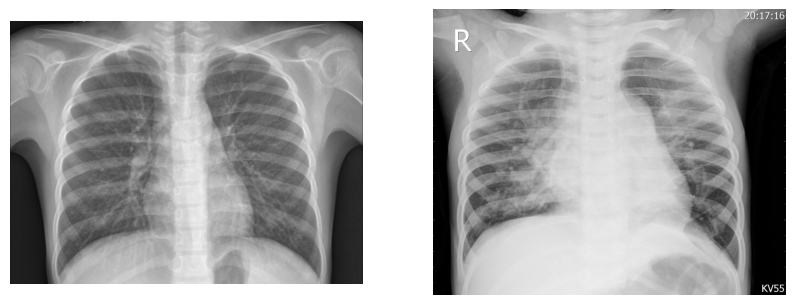

In [9]:
import matplotlib.pyplot as plt
from PIL import Image

# Cargar las imágenes
imagen1 = Image.open("imagen1.jpg")
imagen2 = Image.open("imagen2.jpg")

# Crear una figura y ejes de subtramas
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Mostrar la primera imagen en el primer eje de subtrama
axs[0].imshow(imagen1,cmap="gray")
axs[0].axis('off')  # Desactivar los ejes

# Mostrar la segunda imagen en el segundo eje de subtrama
axs[1].imshow(imagen2,cmap="gray")
axs[1].axis('off')  # Desactivar los ejes

# Ajustar el espacio entre las subtramas
plt.subplots_adjust(wspace=0.2)

# Mostrar la figura
plt.show()


In [10]:
pipe('imagen1.jpg')

[{'label': 'NORMAL', 'score': 0.9813147187232971},
 {'label': 'PNEUMONIA', 'score': 0.01868528686463833}]

In [11]:
pipe('imagen2.jpg')

[{'label': 'PNEUMONIA', 'score': 0.9920761585235596},
 {'label': 'NORMAL', 'score': 0.007923857308924198}]